Medidas de Dispersão de grupos de empréstimo que tiveram a mesma duração e quantidade de dias emprestados

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [157]:
data = "emprestimos_biblioteca_junho_2023.xlsx"
df = pd.read_excel(data, engine='openpyxl')

In [158]:
df['data_emprestimo'] = pd.to_datetime(df['DATA_EMPRESTIMO_CHAR'], errors='coerce', dayfirst=True)
df['data_devolucao'] = pd.to_datetime(df['DATA_DEV_EFETIVA_CHAR'], errors='coerce', dayfirst=True)

df['dias_emprestados'] = (df['data_devolucao'] - df['data_emprestimo']).dt.days

df = df[df['dias_emprestados'].notnull() & (df['dias_emprestados'] >= 0)]

df_grouped = df.groupby(['dias_emprestados']).size().reset_index(name='qtd_emprestimos')

In [159]:
# Amplitude
def amplitude(emprestimos):
    return emprestimos.max() - emprestimos.min()

print(f"Números (Quantidade de grupos de empréstimo que tiveram a mesma duração):\n{df_grouped['qtd_emprestimos'].values}")
print(f"Amplitude (Quantidade de grupos de empréstimo que tiveram a mesma duração): {amplitude(df_grouped['qtd_emprestimos'])}")
print(f"Amplitude (Quantidade de dias emprestados): {amplitude(df_grouped['dias_emprestados'])}")

Números (Quantidade de grupos de empréstimo que tiveram a mesma duração):
[ 228  189  171  156  181  253  454 1900  370  229  336  368  249  346
 1051  192   82   65   43   26   44   53   37   35   20   22   14    9
   33   15   10    7    7    7    6    9    2    1    2    1    1    1
    2    4    3    2]
Amplitude (Quantidade de grupos de empréstimo que tiveram a mesma duração): 1899
Amplitude (Quantidade de dias emprestados): 46


In [160]:
# Variância
def variancia(emprestimos):
  media = sum(emprestimos) / len(emprestimos)
  return sum((i - media) ** 2 for i in emprestimos) / len(emprestimos)

print(f"Números (Quantidade de grupos de empréstimo que tiveram a mesma duração): {df_grouped['qtd_emprestimos'].values}")
print(f"Variância (Quantidade de grupos de empréstimo que tiveram a mesma duração): {variancia(df_grouped['qtd_emprestimos'])}")
print(f"Variância (Quantidade de dias emprestados): {variancia(df_grouped['dias_emprestados'])}")

Números (Quantidade de grupos de empréstimo que tiveram a mesma duração): [ 228  189  171  156  181  253  454 1900  370  229  336  368  249  346
 1051  192   82   65   43   26   44   53   37   35   20   22   14    9
   33   15   10    7    7    7    6    9    2    1    2    1    1    1
    2    4    3    2]
Variância (Quantidade de grupos de empréstimo que tiveram a mesma duração): 102183.77693761814
Variância (Quantidade de dias emprestados): 178.20463137996222


In [161]:
# Desvio Padrão
def desvio_padrao(emprestimos):
  return variancia(emprestimos) ** 0.5

print(f"Números (Quantidade de grupos de empréstimo que tiveram a mesma duração): {df_grouped['qtd_emprestimos'].values}")
print(f"Desvio Padrão (Quantidade de grupos de empréstimo que tiveram a mesma duração): {desvio_padrao(df_grouped['qtd_emprestimos'])}")
print(f"Desvio Padrão (Quantidade de dias emprestados): {desvio_padrao(df_grouped['dias_emprestados'])}")

Números (Quantidade de grupos de empréstimo que tiveram a mesma duração): [ 228  189  171  156  181  253  454 1900  370  229  336  368  249  346
 1051  192   82   65   43   26   44   53   37   35   20   22   14    9
   33   15   10    7    7    7    6    9    2    1    2    1    1    1
    2    4    3    2]
Desvio Padrão (Quantidade de grupos de empréstimo que tiveram a mesma duração): 319.66197293018473
Desvio Padrão (Quantidade de dias emprestados): 13.349330746519176


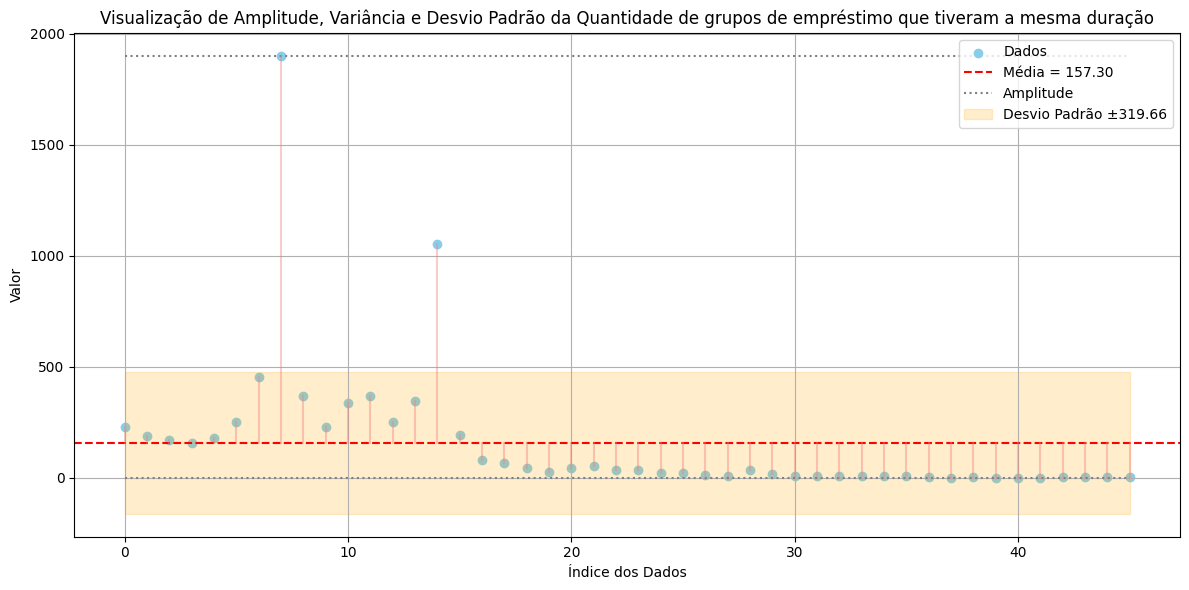

,Medida,Valor
0,Média,157.30
1,Desvio Padrão,319.66
2,Variância,102183.78
3,Valor Mínimo,1.00
4,Valor Máximo,1900.00
5,Amplitude,1899.00


In [162]:
media = np.mean(df_grouped['qtd_emprestimos'].values)
minimo = np.min(df_grouped['qtd_emprestimos'])
maximo = np.max(df_grouped['qtd_emprestimos'])

plt.figure(figsize=(12, 6))

plt.scatter(range(len(df_grouped['qtd_emprestimos'])), df_grouped['qtd_emprestimos'], color='skyblue', label='Dados')

plt.axhline(media, color='red', linestyle='--', label=f'Média = {media:.2f}')

plt.hlines(y=[minimo, maximo], xmin=0, xmax=len(df_grouped['qtd_emprestimos'].values)-1, colors='gray', linestyles='dotted', label='Amplitude')

desvio = desvio_padrao(df_grouped['qtd_emprestimos'].values)

plt.fill_between(range(len(df_grouped['qtd_emprestimos'])), media - desvio, media + desvio,
                 color='orange', alpha=0.2, label=f'Desvio Padrão ±{desvio:.2f}')

for i, y in enumerate(df_grouped['qtd_emprestimos']):
    plt.plot([i, i], [media, y], color='lightcoral', alpha=0.4)

plt.title("Visualização de Amplitude, Variância e Desvio Padrão da Quantidade de grupos de empréstimo que tiveram a mesma duração")
plt.xlabel("Índice dos Dados")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

tabela = pd.DataFrame({
    'Medida': ['Média', 'Desvio Padrão', 'Variância', 'Valor Mínimo', 'Valor Máximo', 'Amplitude'],
    'Valor': [
        media,
        desvio_padrao(df_grouped['qtd_emprestimos']),
        variancia(df_grouped['qtd_emprestimos']),
        minimo,
        maximo,
        amplitude(df_grouped['qtd_emprestimos'])
    ]
})

tabela.style.format({'Valor': '{:.2f}'})

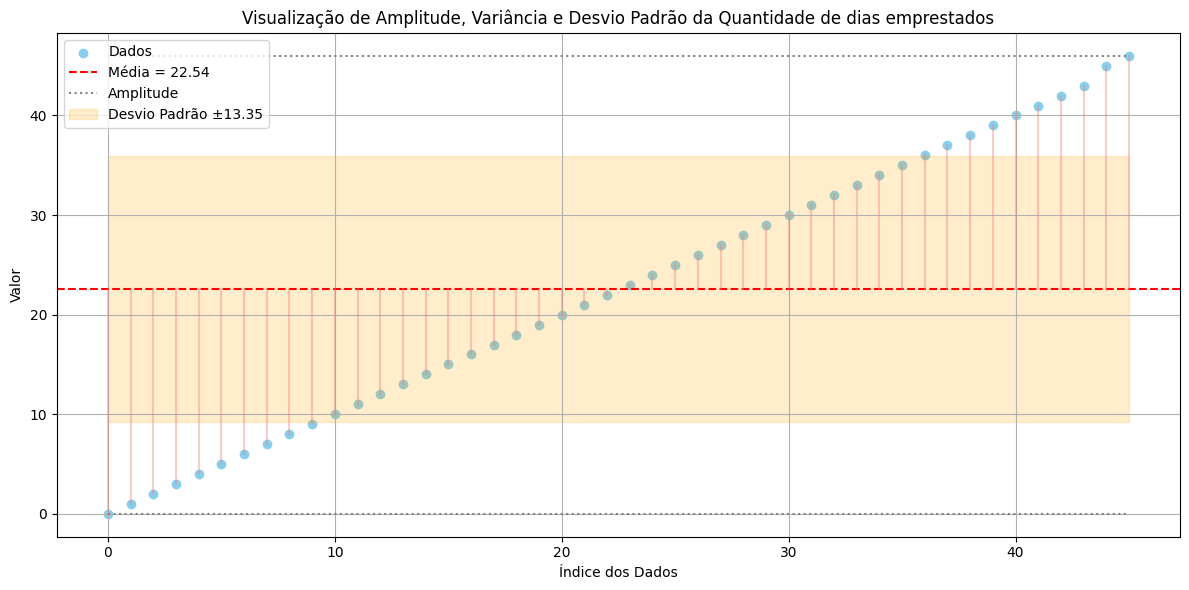

,Medida,Valor
0,Média,22.54
1,Desvio Padrão,13.35
2,Variância,178.20
3,Valor Mínimo,0.00
4,Valor Máximo,46.00
5,Amplitude,46.00


In [163]:
media = np.mean(df_grouped['dias_emprestados'].values)
minimo = np.min(df_grouped['dias_emprestados'])
maximo = np.max(df_grouped['dias_emprestados'])

plt.figure(figsize=(12, 6))

plt.scatter(range(len(df_grouped['dias_emprestados'])), df_grouped['dias_emprestados'], color='skyblue', label='Dados')

plt.axhline(media, color='red', linestyle='--', label=f'Média = {media:.2f}')

plt.hlines(y=[minimo, maximo], xmin=0, xmax=len(df_grouped['dias_emprestados'].values)-1, colors='gray', linestyles='dotted', label='Amplitude')

desvio = desvio_padrao(df_grouped['dias_emprestados'].values)

plt.fill_between(range(len(df_grouped['dias_emprestados'])), media - desvio, media + desvio,
                 color='orange', alpha=0.2, label=f'Desvio Padrão ±{desvio:.2f}')

for i, y in enumerate(df_grouped['dias_emprestados']):
    plt.plot([i, i], [media, y], color='lightcoral', alpha=0.4)

plt.title("Visualização de Amplitude, Variância e Desvio Padrão da Quantidade de dias emprestados")
plt.xlabel("Índice dos Dados")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

tabela = pd.DataFrame({
    'Medida': ['Média', 'Desvio Padrão', 'Variância', 'Valor Mínimo', 'Valor Máximo', 'Amplitude'],
    'Valor': [
        media,
        desvio_padrao(df_grouped['dias_emprestados']),
        variancia(df_grouped['dias_emprestados']),
        minimo,
        maximo,
        amplitude(df_grouped['dias_emprestados'])
    ]
})

tabela.style.format({'Valor': '{:.2f}'})